In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

### 8.1 The estimation game

In a rudimentary way, <b>sample mean</b> can be used to estimate a distribution. The process is called <b>estimation</b> and the statistic we used (sample mean) is called an <b>estimator</b>. If there are no <b>outliers</b>, sample mean minimizes the <b>mean squared error (MSE)</b>. A <b>maximum likelihood estimator (MLE)</b> is an estimator that has the highest chance of being right (value with highest probability). 

<b>Exercise 8.1:</b> Write a function that draws 6 values froma normal distribution with $\mu$ = 0 and $\sigma$ = 1. Use the sample mean to estimate m and compute the error $\bar{x} - \mu$. Run the function 1000 times and compute MSE.

Now modify the program to use the median as an estimator. Compute MSE again and compare to the MSE for $\bar{x}$.

<b>Solution:</b> MSE for mean as the estimator is less.

In [2]:
from scipy.stats import norm
import numpy as np

norm = norm(loc=0, scale=1)
count = 1000
MSE_mean = 0
MSE_median = 0
for i in range(0, count):
    rvs = norm.rvs(size=6)
    sample_mean = rvs.mean()
    sample_median = np.median(rvs)
    MSE_mean += (sample_mean**2)
    MSE_median += (sample_median**2)

print("MSE when maen is the estimator is: " +str(MSE_mean/count))
print("MSE when madian is the estimator is: " +str(MSE_median/count))

MSE when maen is the estimator is: 0.16503949703743645
MSE when madian is the estimator is: 0.20949112657014224


### 8.2 Guess the variance

For the estimation of variance of a distribution, sample variance which is defined as follows is an adequate estimator for large sample size. 

$$S^{2} = \frac{1}{n}\sum(x_{i} - \bar{x})^{2}$$

But for small sample sizes, it tends to be low and is called a <b>biased estimator</b>. An estimator is <b>unbiased</b> if the expected total (or mean) error, after many iterations of the estimation is 0. There is another simple statistic that is an unbiased estimator of $\sigma^{2}$, which is given as:

$$S^{2}_{n-1} = \frac{1}{n-1}\sum(x_{i} - \bar{x})^{2}$$

<b>Exercise 8.2:</b> Write a function that draws 6 values froma normal distribution with $\mu$ = 0 and $\sigma$ = 1. Use the sample variance to estimate s2 and compute the error $S^{2} - \sigma^{2}$. Run the function 1000 times and compute mean error (not squared).

Now modify the program to use the unbiased estimator $S^{2}_{n-1}$. Compute the mean error again and see if it converges to zero as you increase the number of games.

In [3]:
from scipy.stats import norm
import numpy as np

norm = norm(loc=0, scale=1)
count = 1000
mean_error_S = 0
mean_error_S_n1 = 0
sample_size = 1000

for i in range(count):
    rvs = norm.rvs(size=sample_size)
    sample_mean = rvs.mean()
    sample_variance = np.sum(np.square(rvs - sample_mean))
    mean_error_S += abs((sample_variance) / (sample_size) - 1.0)
    mean_error_S_n1 += abs((sample_variance) / (sample_size-1) - 1.0)

print("Mean error for biased estimator of variance: " +str(mean_error_S/count))
print("Mean error for unbiased estimator of variance: " +str(mean_error_S_n1/count))

Mean error for biased estimator of variance: 0.034980760578752344
Mean error for unbiased estimator of variance: 0.034968783350441


### 8.4 Exponential distributions

For an exponential distribution, the <b>MLE estimator</b> for the parameter $\lambda$ is 1\ $\bar{x}$, where $\bar{x}$ is the mean. An alternate is the estimation based on median. As for an exponential distribution, median is given as:

$$\mu_{\frac{1}{2}} = \frac{ln(2)}{\lambda}$$

and hence the estimator based on median is:

$$\bar{\lambda} = \frac{ln(2)}{\mu_{\frac{1}{2}}}$$

<b>Exercise 8.3:</b> Run an experiment to see which of mean and median estimator yields lower MSE. Test whether either of them is biased.

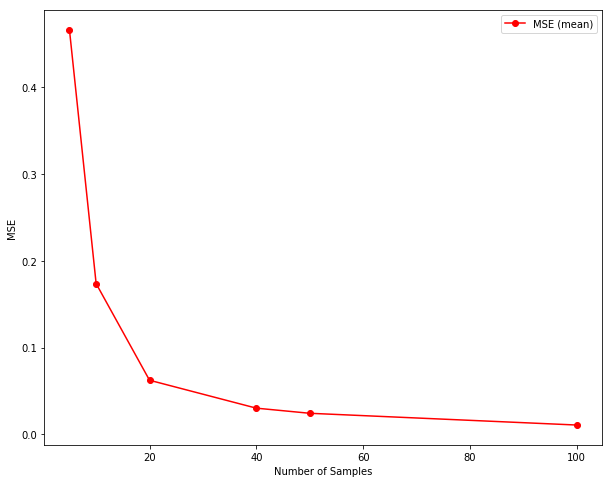

In [6]:
from scipy.stats import expon
import numpy as np
import math
import matplotlib.pylab as plt

expon = expon(loc=0, scale=1) # lambda = 1
count = 1000
samples = [5, 10, 20, 40, 50, 100, 100]
error_mean = {}
error_median = {}

for sample_size in (samples):
    e_mean = 0
    e_median = 0
    for i in range(0, count):
        rvs = expon.rvs(size=sample_size)
        sample_mean = rvs.mean()
        sampel_median = np.median(rvs)
        lamba_mean = 1/sample_mean
        lambda_median = math.log(2)/sample_median
        e_mean += (lamba_mean - 1.0)**2
        e_median += (lambda_median - 1.0)**2
    error_mean[sample_size] = e_mean / count
    error_median[sample_size] = e_median / count

fig = plt.figure(figsize=(10,8))
l1 = sorted(error_mean.items()) # sorted by key, return a list of tuples
x, y = zip(*l1) # unpack a list of pairs into two tuples

plt.plot(x, y, color="r", marker="o", label="MSE (mean)")
plt.xlabel("Number of Samples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

### 8.5 Confidence intervals

So far we have been doing <b>point estimates</b>. <b>Confidenc Intervals</b> is a range in which there is certain percent of chance of the value estimated to lie in. In general, confidence intervals are hard to compute analytically but relatively easy to estimate using simulation.

### 8.6 Bayesian estimation 

If a 90% confidence interval is computed, it can be said that the true value of the parameter has a 90% chance of falling in the interval. But from a frequentist point if view, the parameter is an unknown but fixed value and hence it is either in the interval we computed or not.

### 8.7 Implementing Bayesian estimation

Prior distribution can be represented by PMF or CDF but PMF is a natural choice as we want to map from a hypothesis to a probability. Each value in PMF represents a hypothesis; for example, the value 0.5 represents that $\lambda$ is 0.5. 

Bayesian estimation can be explained as a case: there is a room full of people, where each person has a different guess about whatever we are trying to estimate. Initially, each person has a degree of confidence about their own hypothesis. After seeing the evidence, each person updates their confidence based on P(E|H), the likelihood of the evidence, given their hypothesis. As a result, some people get more confident and some less about their guess depending on the relative likelihood of their hypothesis.

<b>Exercise 8.5:</b> In the 2008 Minnesota Senate race the final vote count was 1,212,629 votes for Al Franken and 1,212,317 votes for Norm Coleman. Franken was declared the winner, but as Charles Seife points out in Proofiness, the margin of victory was much smaller than the margin of error, so the result should have been considered a tie.

Assuming that there is a chance that any vote might be lost and a chance that any vote might be double-counted, what is the probability that Coleman actually received more votes?

<b>Solution:</b> We choose to model the votes as Poisson distributions.

In [5]:
from scipy.stats import poisson

franken_dist = poisson.rvs(1212629, size=1000)
coleman_dist = poisson.rvs(1212317, size=1000)

count = 0
for i in range(0, 1000):
    if franken_dist[i] < coleman_dist[i]:
        count += 1
print("Probability of Coleman getting more votes is: " + str(count/1000))

Probability of Coleman getting more votes is: 0.405


### 8.9 The locomotive problem

The locomotive problem is a classic problem in probability. The statement is:

A railraod number its locomotive in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.

Suppose that there are N trains and every time we play the estimation game, we see train $i$ and guess $ai$, so the squared error is $(ai-N)^{2}$. If we play the game N times and see each train once, the mean squared error is

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(ai-N)^{2}$$

To minimize the MSE, we take the derivative with respect to a:

$$\frac{dMSE}{da} = \frac{1}{N}\sum_{i=1}^{N}2i(ai-N) = 0$$

Solving for a we get,

$$a = \frac{3N}{2N+1}$$

It does not seem very useful as for the estimation, we need to know N, which we have to estimate. Though, for large value of N, the value of a converges to 3/2 and we could choose 3i/2 as the estimator.

To find an unbiased estimator, we can compute the mean error(ME) as:

$$ME = \frac{1}{N}\sum_{i=1}^{N}(ai-N)$$

and find the value of a that yeilds ME=0, which turn out to be

$$a = \frac{2N}{N+1}$$

which converges to 2 for large value of N, maming 2i as the estimator.

Hence, the three generated estimators are $i$ for <b>maximizing likelihood</b>, $3i/2$ for <b>minimizing squared error </b> and $2i$ as the <b>unbiased estimator</b>. Finally to compute the Bayesian posterior distribution, we compute

$$P(H_{n}|i) = \frac{P(i|H_{n}) P(H_{n})}{P(i)}$$

where $H_n$ is the hypothesis that there are $n$ trains and $i$ is the evidence that we saw train $i$. $P(i| H_n)$ is 1\n. The normalizing constant P(i) is just the sum of the numerators for each hypothesis.